In [1]:
import numpy as np
import pandas as pd
Spam_dataset = open('/content/SMSSpamCollection','r')

In [2]:
print(Spam_dataset)

<_io.TextIOWrapper name='/content/SMSSpamCollection' mode='r' encoding='UTF-8'>


In [3]:
l = Spam_dataset.readlines()

In [4]:
from collections import defaultdict
df_dict =  defaultdict(list)

for i in l:
  i = i.strip('\n').split('\t')
  df_dict['text'].append(i[1])
  df_dict['category'].append(i[0])
  


In [5]:
df = pd.DataFrame(df_dict)

In [6]:
df

,text,category
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5569,This is the 2nd time we have tried 2 contact u...,spam
5570,Will ü b going to esplanade fr home?,ham
5571,"Pity, * was in mood for that. So...any other s...",ham
5572,The guy did some bitching but I acted like i'd...,ham


In [7]:
df[df.duplicated()]

,text,category
103,As per your request 'Melle Melle (Oru Minnamin...,ham
154,As per your request 'Melle Melle (Oru Minnamin...,ham
207,"As I entered my cabin my PA said, '' Happy B'd...",ham
223,"Sorry, I'll call later",ham
326,No calls..messages..missed calls,ham
...,...,...
5526,You are awarded a SiPix Digital Camera! call 0...,spam
5537,"I know you are thinkin malaria. But relax, chi...",ham
5541,Just sleeping..and surfing,ham
5555,Hahaha..use your brain dear,ham


In [8]:
df.drop_duplicates(subset ="text", 
                     keep = False, inplace = True)

In [9]:
df

,text,category
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
5,FreeMsg Hey there darling it's been 3 week's n...,spam
...,...,...
5569,This is the 2nd time we have tried 2 contact u...,spam
5570,Will ü b going to esplanade fr home?,ham
5571,"Pity, * was in mood for that. So...any other s...",ham
5572,The guy did some bitching but I acted like i'd...,ham


In [10]:
df_ham = df.loc[df['category']=='ham']

In [11]:
df_ham_text = list(df_ham['text'])

In [12]:
df_ham_text=' '.join(df_ham_text)

In [13]:
df_ham_text

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... U dun say so early hor... U c already then say... Nah I don\'t think he goes to usf, he lives around here though Even my brother is not like to speak with me. They treat me like aids patent. I\'m gonna be home soon and i don\'t want to talk about this stuff anymore tonight, k? I\'ve cried enough today. I\'ve been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times. I HAVE A DATE ON SUNDAY WITH WILL!! Oh k...i\'m watching here:) Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet. Fine if that\x92s the way u feel. That\x92s the way its gota b Is that seriously how you spell his name? I‘m going to try for 2 months ha ha only joking So ü pay first lar... Then when is da stock comin... Aft

In [14]:
len(list(set(df_ham_text)))

110

In [15]:
df_spam = df.loc[df['category']=='spam']
df_spam_text = list(df_spam['text'])
df_spam_text=' '.join(df_spam_text)

In [16]:
df_spam_text

'FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES, SCOTLAND 4txt/ú1.20 POBOXox36504W45WQ 16+ Thanks for your subscription to Ringtone UK your mobile will be charged £5/month Please confirm by replying YES or NO. If you reply NO you will not be charged 07732584351 - Rodger Burns - MSG = We tried to call you re your reply to our sms for a free nokia mobile + free camcorder. Please call now 08000930705 for delivery tomorrow SMS. ac Sptv: The New Jersey Devils and the Detroit Red Wings play Ice Hockey. Correct or Incorrect? End? Reply END SPTV Congrats! 1 year special cinema pass for 2 is yours. call 09061209465 now! C Suprman V, M

HAM_TEXT

(-0.5, 999.5, 499.5, -0.5)

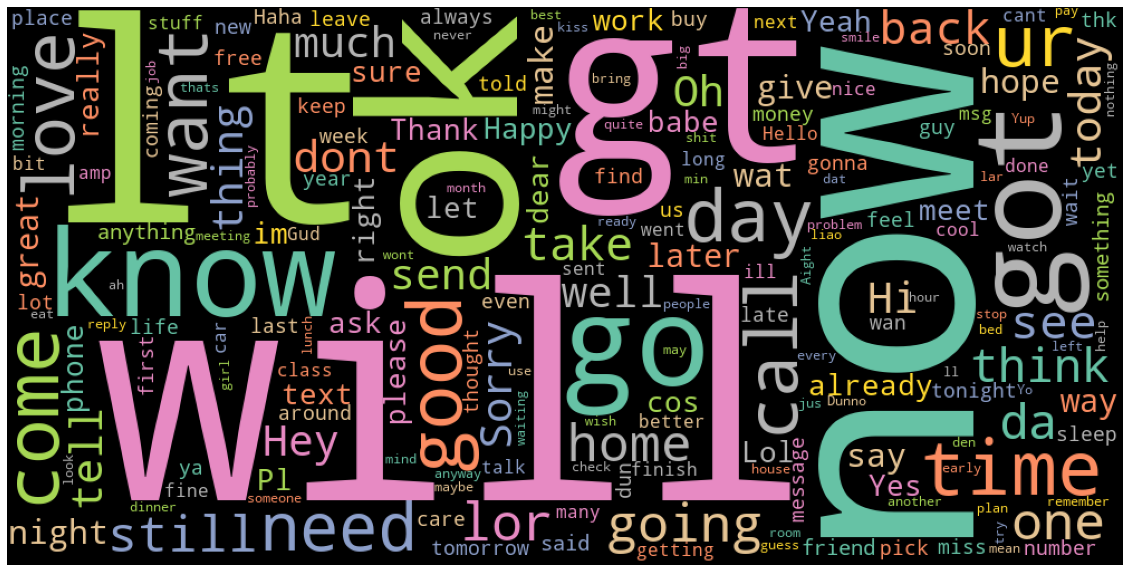

In [17]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 1000, height = 500, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(df_ham_text)
plt.figure(figsize=(20,15))
plt.imshow(wordcloud)
plt.axis('off')

SPAM_TEXT

(-0.5, 999.5, 499.5, -0.5)

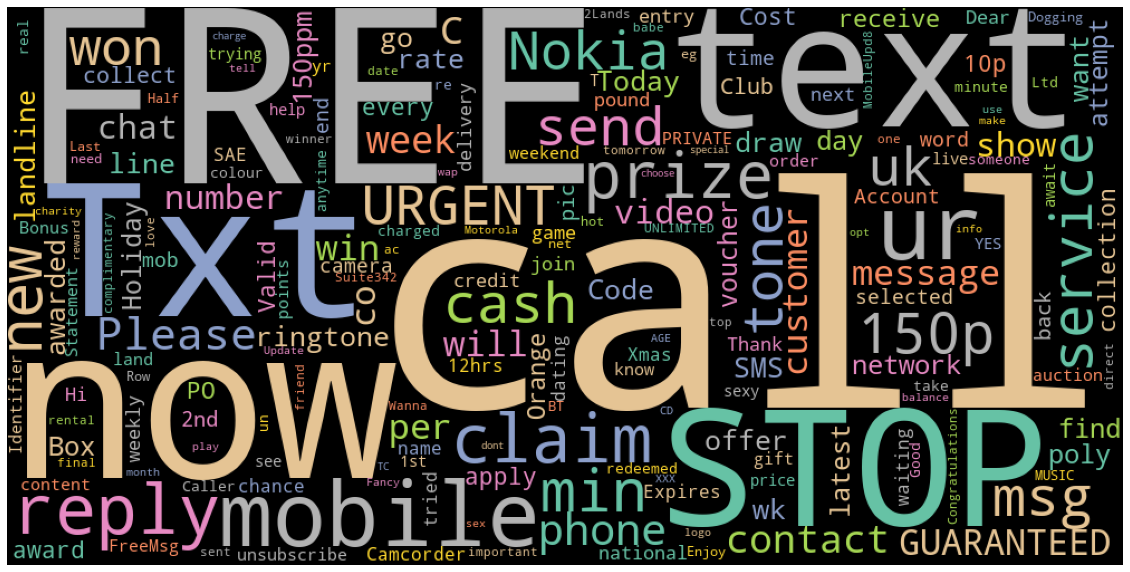

In [18]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 1000, height = 500, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(df_spam_text)
plt.figure(figsize=(20,15))
plt.imshow(wordcloud)
plt.axis('off')

In [19]:
ham_length = df_ham['text'].apply(len)

In [20]:
ham_length.mean()

69.97918593894542

In [21]:
spam_length = df_spam['text'].apply(len)

In [22]:
spam_length.mean()

136.55830388692578

In [23]:
df.groupby('category').describe().T

category                                                   ham                                               spam
text count                                                4324                                                566
     unique                                               4324                                                566
     top     Sun cant come to earth but send luv as rays. c...  Reminder: You have not downloaded the content ...
     freq                                                    1                                                  1

In [24]:
#IMBALANCED DATA

In [25]:
df['category'].value_counts()

ham     4324
spam     566
Name: category, dtype: int64

In [26]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [27]:
from nltk import stem
from nltk.corpus import stopwords
stemmer = stem.SnowballStemmer('english')
stopwords = set(stopwords.words('english'))


In [28]:
import re
def clean_text(text):
  text = re.sub(r'[^\w\s]', '', text)
  text = text.lower()
  text = [x for x in text.split(' ') if x not in stopwords]
  text = ' '.join([stemmer.stem(word) for word in text])
  return text



In [29]:
df['text'] = df['text'].apply(clean_text)

In [30]:
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df['text'],df['category'],test_size = 0.1,random_state=1)

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
vect = TfidfVectorizer()
X_train = vect.fit_transform(X_train)

CLASSIFICATION USING SVM

In [33]:
from sklearn import svm
svm = svm.SVC(C=1000)
svm.fit(X_train, y_train)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
from sklearn.metrics import confusion_matrix
X_test = vect.transform(X_test)
y_pred = svm.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[435   1]
 [ 10  43]]


In [35]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [36]:
X_train,y_train = sm.fit_sample(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [37]:
X_test,y_test = sm.fit_sample(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [38]:
y_pred = svm.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[435   1]
 [ 40 396]]


In [39]:
s = 0
for i in range(len(y_test)):
  s+=(y_test[i]==y_pred[i])
  


In [40]:
s/len(y_test)

0.9529816513761468

Accuracy of the model: 95.29%

TEXT CLASSIFICATION USING RNNs

In [108]:
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df['text'],df['category'],test_size = 0.1,random_state=1)

In [109]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [110]:
vocab_size = 600
max_len = 25
dimension = 8


In [111]:
tokenizer = Tokenizer(num_words=600,oov_token='<OOV>')

In [112]:
tokenizer.fit_on_texts(X_train)

In [113]:
word_ind = tokenizer.word_index

In [114]:
#turn them into sequences
sequence_words = tokenizer.texts_to_sequences(X_train)

In [115]:
seq_padded = pad_sequences(sequence_words,maxlen = max_len,padding='post',truncating='post')

In [116]:
sequence_words_test = tokenizer.texts_to_sequences(X_test)
seq_padded_test = pad_sequences(sequence_words_test,maxlen = max_len,padding='post',truncating='post')

In [117]:
label_tok = Tokenizer()
label_tok.fit_on_texts(y_train)
sequence_label = np.array(label_tok.texts_to_sequences(y_train))
sequence_label_test = np.array(label_tok.texts_to_sequences(y_test))




In [118]:
seq_padded_eq,sequence_label_eq = sm.fit_sample(seq_padded,sequence_label)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [119]:
seq_padded_eq_test,sequence_label_eq_test = sm.fit_sample(seq_padded_test,sequence_label_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [120]:
#build LSTM
from keras.utils import to_categorical
sequence_label_eq  = to_categorical(sequence_label_eq)

In [121]:
sequence_label_eq_test  = to_categorical(sequence_label_eq_test)

In [122]:
'''
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(sequence_label_eq)
sequence_label_eq  = enc.transform(sequence_label_eq).toarray()
'''


"\nfrom sklearn.preprocessing import OneHotEncoder\nenc = OneHotEncoder(handle_unknown='ignore')\nenc.fit(sequence_label_eq)\nsequence_label_eq  = enc.transform(sequence_label_eq).toarray()\n"

In [123]:
'''
enc.fit(sequence_label_eq_test)
sequence_label_eq_test  = enc.transform(sequence_label_eq_test).toarray()
'''

'\nenc.fit(sequence_label_eq_test)\nsequence_label_eq_test  = enc.transform(sequence_label_eq_test).toarray()\n'

In [131]:
model = tf.keras.Sequential([
              tf.keras.layers.Embedding(vocab_size,dimension),
              #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(dimension)),
              #tf.keras.layers.Dense(dimension,activation='relu'),
              tf.keras.layers.LSTM(dimension),
              tf.keras.layers.Dense(dimension,activation='relu'),
              tf.keras.layers.Dense(3,activation='softmax')
])

In [132]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [133]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 8)           4800      
_________________________________________________________________
lstm_6 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 27        
Total params: 5,443
Trainable params: 5,443
Non-trainable params: 0
_________________________________________________________________


In [134]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [135]:

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
his = model.fit(seq_padded_eq,sequence_label_eq,epochs = 10,validation_data=(seq_padded_eq_test,sequence_label_eq_test),verbose=2)

Epoch 1/10
243/243 - 4s - loss: 0.7772 - accuracy: 0.5390 - val_loss: 0.6185 - val_accuracy: 0.8314
Epoch 2/10
243/243 - 2s - loss: 0.4298 - accuracy: 0.8351 - val_loss: 0.2807 - val_accuracy: 0.8922
Epoch 3/10
243/243 - 2s - loss: 0.3319 - accuracy: 0.8670 - val_loss: 0.2676 - val_accuracy: 0.8922
Epoch 4/10
243/243 - 2s - loss: 0.3048 - accuracy: 0.8813 - val_loss: 0.2649 - val_accuracy: 0.8911
Epoch 5/10
243/243 - 2s - loss: 0.2971 - accuracy: 0.8861 - val_loss: 0.2507 - val_accuracy: 0.8933
Epoch 6/10
243/243 - 2s - loss: 0.2820 - accuracy: 0.8904 - val_loss: 0.2476 - val_accuracy: 0.9002
Epoch 7/10
243/243 - 2s - loss: 0.2720 - accuracy: 0.8947 - val_loss: 0.2503 - val_accuracy: 0.9002
Epoch 8/10
243/243 - 2s - loss: 0.2620 - accuracy: 0.8971 - val_loss: 0.2687 - val_accuracy: 0.8784
Epoch 9/10
243/243 - 2s - loss: 0.2496 - accuracy: 0.9043 - val_loss: 0.2432 - val_accuracy: 0.8968
Epoch 10/10
243/243 - 2s - loss: 0.2354 - accuracy: 0.9110 - val_loss: 0.2339 - val_accuracy: 0.9014

In [136]:
from matplotlib import pyplot


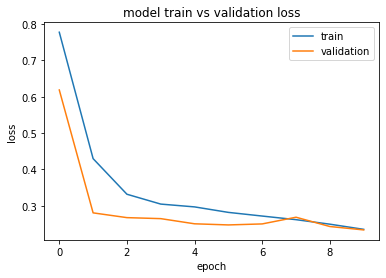

In [137]:
pyplot.plot(his.history['loss'])
pyplot.plot(his.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [138]:
y_pred = model.predict_proba(seq_padded_eq_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [139]:
y_pred

array([[5.8364432e-05, 2.5308052e-02, 9.7463357e-01],
       [1.1861742e-04, 8.5284215e-01, 1.4703920e-01],
       [4.7743491e-05, 9.6456838e-01, 3.5383888e-02],
       ...,
       [4.0187726e-05, 1.0143143e-02, 9.8981667e-01],
       [1.9089204e-05, 3.4989098e-03, 9.9648201e-01],
       [1.9285213e-05, 5.3406274e-03, 9.9464017e-01]], dtype=float32)

In [140]:
y_pred = np.argmax(y_pred, axis=1, out=None)


In [141]:
sequence_label_eq_test = np.argmax(sequence_label_eq_test, axis=1, out=None)

In [142]:
print(confusion_matrix(sequence_label_eq_test, y_pred))
s = 0
for i in range(len(sequence_label_eq_test)):
  s+=(sequence_label_eq_test[i]==y_pred[i])
print(s/len(sequence_label_eq_test))

[[398  38]
 [ 48 388]]
0.9013761467889908


Accuracy of RNN with LSTM is 90.13%

TEXT CLASSIFICATION USING NAIVE-BAYES ALGORITHM

In [147]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB 

In [148]:
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df['text'],df['category'],test_size = 0.1,random_state=1)

In [157]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
X_train = vect.fit_transform(X_train)

In [158]:
from imblearn.over_sampling import SMOTE 
X_test = vect.transform(X_test)
sm = SMOTE(random_state = 2)
X_train,y_train = sm.fit_sample(X_train,y_train)
X_test,y_test = sm.fit_sample(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [159]:
model = make_pipeline(MultinomialNB())

In [160]:
model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [161]:
y_pred = model.predict(X_test)

In [163]:
s = 0
for i in range(len(y_test)):
  s+=(y_test[i]==y_pred[i])

In [166]:
s/len(y_test)

0.9621559633027523

Accuracy of Naive Bayes 96.21%